In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
#määrät, esim hälytyskäynnit kk
series=[500,350,250,400,450,350,200,300,350,200,150,400,
   550,350,250,550,550,400,350,600,750,500,400,650,850]
index = pd.date_range('2000-03-31', periods=25, freq='M')
data = pd.DataFrame(series, index=index).astype('float')
data.columns = ['Demand']

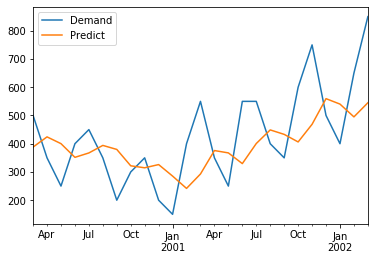

In [3]:
malli = SimpleExpSmoothing(data['Demand']).fit()
data['Predict'] = malli.fittedvalues

data.plot()

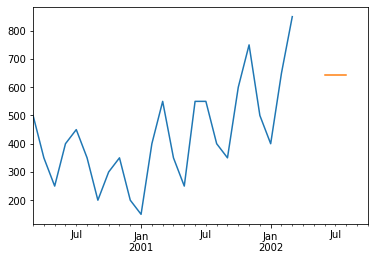

In [4]:
index = pd.date_range('2002-06-30', periods=5, freq='M')
datap = pd.DataFrame(malli.forecast(5), index=index)
datap.columns = ['Predict']
data['Demand'].plot()
datap['Predict'].plot()

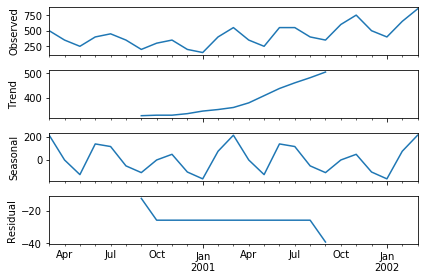

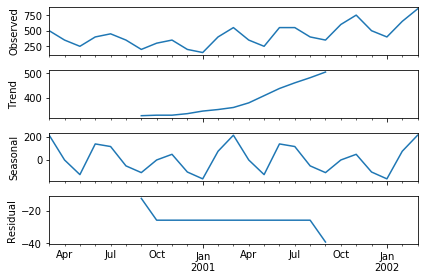

In [5]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(data['Demand']).plot()

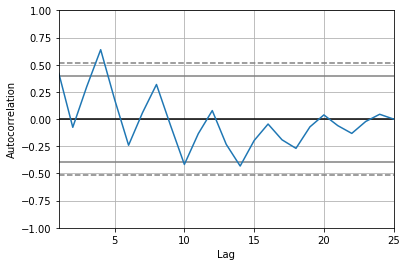

In [6]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Demand'])